<a href="https://colab.research.google.com/github/karolinavg/Evidencias-de-las-Actividades/blob/main/A9_Regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sample_data
from sklearn import linear_model as LM
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

In [ ]:
data='/content/drive/MyDrive/Colab Notebooks/antropometria-dataset-2.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv(data)
df.head()

,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,...,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,210295,2,21,PUEBLA,2,38,8,73.70,2,146.4,...,16:30,2,16:35,1,R2101,5,3,1,3470.002176,215
1,101655,3,10,DURANGO,2,11,11,35.65,2,145.1,...,15:25,3,15:25,1,M1041,1,1,1,417.946672,101
2,10287,6,1,AGUASCALIENTES,2,18,8,54.80,1,162.0,...,9:40,1,9:40,1,M0108,5,3,1,472.980811,15
3,91526,4,9,DISTRITO FEDERAL,1,10,8,33.40,2,146.5,...,7:40,3,7:45,1,M0931,4,3,2,1832.581391,94
4,210939,3,21,PUEBLA,2,19,3,97.95,2,161.0,...,6:00,2,6:00,1,M2123,5,3,1,7622.066564,215


In [ ]:
df.dropna(inplace = True) 

peso = b0 + b1*cintura

In [ ]:
model1A=sm.OLS.from_formula('diastol~sistol',data=df)
resultA=model1A.fit()
resultA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                diastol   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                 1.409e+04
Date:                Fri, 02 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:55:46   Log-Likelihood:                -64272.
No. Observations:               18032   AIC:                         1.285e+05
Df Residuals:                   18030   BIC:                         1.286e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.9991      0.440     54.564      0.000      23.137      24.861
sistol         0.4350      0.004    118.705      0.000       0.428       0.442
==============================================================================
Omnibus:                     1016.455   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3973.980
Skew:                           0.128   Prob(JB):                         0.00
Kurtosis:                       5.286   Cond. No.                         830.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#peso= -8.3137 + 0.8316*cintura
print('El peso cuando la cintura mide _____ es :',-8.3137 + 0.8316*1)

El peso cuando la cintura mide _____ es : -7.482100000000001


In [ ]:
favs=['cadera','peso']
ndf=df[favs]
ndf.dropna(inplace=True)
ndf

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,cadera,peso
0,106.0,73.70
1,75.0,35.65
2,94.3,54.80
3,72.2,33.40
4,127.0,97.95
...,...,...
18635,113.0,75.80
18636,113.7,69.40
18637,86.0,46.75
18638,94.8,59.05


In [ ]:
x=pd.DataFrame(ndf.cadera)
y=pd.DataFrame(ndf.peso)

In [ ]:
type(x)

pandas.core.frame.DataFrame

In [ ]:
lm=LM.LinearRegression()
model_lm=lm.fit(x,y)
model_lm

LinearRegression()

In [ ]:
print('Model intercept is: ',model_lm.intercept_)
print('Model coefficient is: ',model_lm.coef_)
model_lm.score(x,y)

Model intercept is:  [-30.09720035]
Model coefficient is:  [[0.96975238]]


0.6038232783357167

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

In [ ]:
regressor = LinearRegression() 

In [ ]:
regressor.fit(x_train, y_train) 

LinearRegression()

In [ ]:
y_pred = regressor.predict(x_test)

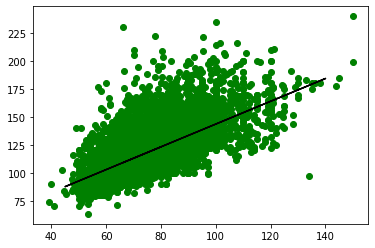

In [ ]:
plt.plot(x_test, y_pred,color='k') 
plt.scatter(x_train, y_train,color='g') 


In [ ]:
resultA.resid

0         2.650177
1        -4.657717
2         2.718398
3        -6.056739
4         8.550740
           ...    
18635     8.342597
18636    13.027603
18637    -0.569212
18638     0.572105
18639    12.727437
Length: 18032, dtype: float64

In [ ]:
model1B=sm.OLS.from_formula('diastol~sistol',data=df)
resultB=model1B.fit()
resultB.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                diastol   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                 1.409e+04
Date:                Fri, 02 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:47:07   Log-Likelihood:                -64272.
No. Observations:               18032   AIC:                         1.285e+05
Df Residuals:                   18030   BIC:                         1.286e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.9991      0.440     54.564      0.000      23.137      24.861
sistol         0.4350      0.004    118.705      0.000       0.428       0.442
==============================================================================
Omnibus:                     1016.455   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3973.980
Skew:                           0.128   Prob(JB):                         0.00
Kurtosis:                       5.286   Cond. No.                         830.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
residB= resultB.resid
residB

0         1.735293
1        -4.451156
2       -13.668671
3         9.113814
4        -1.821215
           ...    
18635   -24.640605
18636   -42.684392
18637   -58.055870
18638   -26.231017
18639    21.593835
Length: 18032, dtype: float64

In [ ]:
type(residB)

pandas.core.series.Series

In [ ]:
from scipy.ndimage.measurements import median
residB_list = residB.tolist()
#sum(residB_list)/len(residB_list)
median(residB_list)

0.011363868221820894

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson as dwtest

#Durbin-Watson test
dwtest(resids=np.array(resultB.resid))

1.745053985223873

In [ ]:
print('Correlación Pearson: ', df['cadera'].corr(df['peso'], method='pearson'))
print('Correlación spearman: ', df['cadera'].corr(df['peso'], method='spearman'))
print('Correlación kendall: ', df['cadera'].corr(df['peso'], method='kendall'))

Correlación Pearson:  0.7770606658014013
Correlación spearman:  0.864463405769021
Correlación kendall:  0.6907704257654824


In [ ]:
#diastol = b0+ b1*sistol + b2*edad + b3*peso + b4*cintura 
model1C=sm.OLS.from_formula('diastol~sistol + edad + peso + cintura',data=df)
resultC=model1C.fit()
resultC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                diastol   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     3812.
Date:                Fri, 02 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:34:57   Log-Likelihood:                -63952.
No. Observations:               18032   AIC:                         1.279e+05
Df Residuals:                   18027   BIC:                         1.280e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.3297      0.520     39.089      0.000      19.310      21.349
sistol         0.4140      0.004     94.447      0.000       0.405       0.423
edad          -0.0272      0.004     -6.934      0.000      -0.035      -0.020
peso           0.0825      0.006     14.154      0.000       0.071       0.094
cintura        0.0202      0.007      3.072      0.002       0.007       0.033
==============================================================================
Omnibus:                     1031.138   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3722.633
Skew:                           0.189   Prob(JB):                         0.00
Kurtosis:                       5.194   Cond. No.                     1.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#diastol = b0+ b1*sistol + b2*edad + b3*peso + b4*cintura 
print('El valor de b2 usando el modelo C es',20.3297 + 0.4140*sistol + 

NameError: ignored